Simulation model 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
from cmcrameri import cm as  cmc
import pandas as pd
import xarray as xr

import pdb
import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')
from scipy.stats import norm, beta, bernoulli


import ml_estimation as ml
import ml_estimation2 as ml2
import model1_plots as mp
import model1_explore as me
import model1_sim as sim1
import Utilities as util

def createFilename(prop):
    return 'sim_' + '_'.join([f'{x}={prop[x]}' for x in prop])

## parameters from fit

In [2]:
ds = xr.open_dataset('../mod/model2/dH=500_dD=0_5_N=5000local_param.nc')

ds_m1_c = xr.open_dataset('../mod/model1/expl_local_param.nc')
ds_m1_cs= xr.open_dataset('../mod/model1/glob_theta.nc')[['theta1', 'theta3']]

# ds_theta#.theta1, ds_theta.theta3
# ds_localda

In [3]:
ds

<xarray.Dataset>
Dimensions:          (cs_mu_dN: 11, cs_mu_hN: 63, est: 2, method: 2, mu_csf: 5, mu_d: 28, mu_dN: 8, mu_h: 79, mu_hN: 13, n_or_val: 2, var_cod: 2, var_cth_b: 2, var_cth_bm: 5)
Coordinates: (12/13)
  * mu_h             (mu_h) float64 100.0 300.0 500.0 ... 1.55e+04 1.57e+04
  * mu_d             (mu_d) float64 -1.0 -0.8 -0.6 -0.4 -0.2 ... 3.8 4.0 4.2 4.4
  * mu_hN            (mu_hN) float64 -1.5e+03 -1.25e+03 ... 1.25e+03 1.5e+03
  * mu_dN            (mu_dN) float64 -0.8 -0.55 -0.3 -0.05 0.2 0.45 0.7 0.95
  * cs_mu_hN         (cs_mu_hN) float64 250.0 500.0 750.0 ... 1.55e+04 1.575e+04
  * cs_mu_dN         (cs_mu_dN) float64 -1.0 -0.5 0.0 0.5 ... 2.5 3.0 3.5 4.0
    ...               ...
  * n_or_val         (n_or_val) object 'val' 'n'
  * method           (method) object 'ML' 'MoM'
  * est              (est) object 'coef' 'bse'
  * var_cth_bm       (var_cth_bm) object 'mu1' 'nu1' 'mu2' 'mu2' 'p'
  * var_cod          (var_cod) object 'mu' 'sigma'
  * var_cth_b        (var_cth_b) object 'alpha' 'beta'
Data variables:
    n                (mu_h, mu_d, mu_hN, mu_dN, mu_csf) float64 ...
    p_cs             (mu_h, mu_d, mu_csf, n_or_val) float64 ...
    param_cod        (mu_h, mu_d, mu_dN, var_cod, n_or_val) float64 ...
    param_cth_bm     (mu_h, mu_d, mu_hN, est, var_cth_bm, n_or_val) float64 ...
    cs_n             (cs_mu_hN, cs_mu_dN, mu_csf) float64 ...
    cs_p_cs          (mu_csf) float64 ...
    cs_param_cod     (cs_mu_dN, var_cod) float64 ...
    cs_param_cth_bm  (cs_mu_hN, est, var_cth_bm) float64 ...

In [4]:
## from cloud 

# p_cs
n_loc = dict(n_or_val = 'n')
n = ds.p_cs.loc[n_loc]


dummy = ds.p_cs.loc[dict(n_or_val = 'val')].where(n > 100)
ds.p_cs.loc[dict(n_or_val = 'val')] = dummy


# cod (mu, sigma)
n_loc = dict(var_cod = 'mu', n_or_val = 'n')
n = ds.param_cod.loc[n_loc]
ds.param_cod.loc[dict(n_or_val = 'val')] = ds.param_cod.loc[
        dict(n_or_val = 'val')].where(n > 100)

#cth ()

ds['var_cth_bm'] = ['mu1', 'nu1', 'mu2', 'nu2', 'p']
n_loc = dict(var_cth_bm = 'mu1', n_or_val = 'n', est = 'coef')
n = ds.param_cth_bm.loc[n_loc]
ds.param_cth_bm.loc[dict(est = 'coef', n_or_val = 'val')] = ds.param_cth_bm.loc[dict(est = 'coef', n_or_val = 'val')].where(
    n > 100)


ds = ds.loc[dict(n_or_val = 'val')]
# .plot(
#     x ='mu_d', y ='mu_h', col ='mu_dN', col_wrap = 4, cmap = cmc.batlow)


# ds['cs_p_cs'] = ds.cs_p_cs.mean(axis = (0,1))
# ds['cs_param_cod'] = ds.cs_param_cod.mean(axis = (0,2))
# ds['cs_param_cth_bm'] = ds.cs_param_cth_bm.mean(axis = (1,2))
# ds['p_cs'] = ds.p_cs.mean(axis = (2,3)).interpolate_na(
#     dim = 'mu_csf', method = 'zero', fill_value = 'extrapolate')
# ds['param_cod'] = ds.param_cod.mean(axis = (2,4))
# ds['param_cth_bm'] = ds.param_cth_bm.mean(axis = (3,4)).interpolate_na(
#     dim = 'mu_hN', method = 'nearest', fill_value = 'extrapolate')
# ds.cs_param_cth_bm

# ds.n.loc[dict(mu_h = ds.mu_h[0])]


### if not available turn to model 1
# x = (8000, 5)
# model 1
mu_h = np.linspace(0, ml.h_max, 60)
mu_d = np.linspace(-3, 6, 50)
ds1 = sim1.param_c(mu_h, mu_d, ds_m1_c, method = 'nearest')
ds1 = ds1.loc[dict(est = 'coef', method = 'ML')]

# p_cs = sim1.theta_c_to_cs(*x, ds1 , method = 'nearest')
# cth_param = sim1.theta_c_to_c_cth(*x, ds1, method = 'nearest')
# cod_param = sim1.theta_c_to_c_cod(*x, ds1, method = 'nearest')
# p_cs, cth_param, cod_param


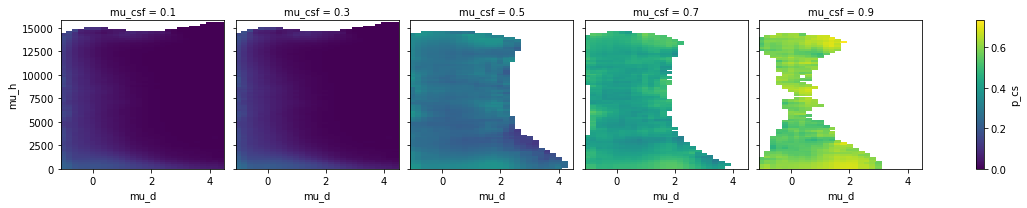

In [5]:
ds.p_cs.plot(col = 'mu_csf')

In [6]:
# ds.p_cs.where(np.isnan(ds.p_cs), drop = True)

# n_loc = dict(n_or_val = 'n')

# n = ds.p_cs.loc[n_loc]

# # ds.p_cs.loc[dict(n_or_val = 'val')].where(n > 100).plot(x ='mu_d', y ='mu_h', col ='mu_csf', col_wrap = 3, cmap = cmc.batlow)

# dummy = ds.p_cs.loc[dict(n_or_val = 'val')].where(n > 100).interpolate_na(
#         dim = 'mu_d', method = 'nearest',
#         fill_value = 'extrapolate'
#         ).interpolate_na(
#         dim = 'mu_h', method = 'nearest', 
#         fill_value = 'extrapolate'
#         )
# ds.p_cs.loc[dict(n_or_val = 'val')] = dummy


# ds.cs_p_cs #ok

# n_loc = dict(var_cod = 'mu', n_or_val = 'n')
# n = ds.param_cod.loc[n_loc]
# ds.param_cod.loc[dict(var_cod = 'mu', n_or_val = 'val')] = ds.param_cod.loc[
#         dict(var_cod = 'mu', n_or_val = 'val')].where(n > 100).interpolate_na(
#         dim = 'mu_h', method = 'nearest',
#         fill_value = 'extrapolate'
#     ).interpolate_na(
#         dim = 'mu_d', method = 'nearest',
#         fill_value = 'extrapolate'
#     )

# ds.param_cod.loc[
#         dict(var_cod = 'sigma', n_or_val = 'val')] = ds.param_cod.loc[
#         dict(var_cod = 'sigma', n_or_val = 'val')].where(n > 100).interpolate_na(
#         dim = 'mu_h', method = 'nearest',
#         fill_value = 'extrapolate'
#     ).interpolate_na(
#         dim = 'mu_d', method = 'nearest',
#         fill_value = 'extrapolate'
#     )

# ds.cs_param_cod # ok

# ds['var_cth_bm'] = ['mu1', 'nu1', 'mu2', 'nu2', 'p']
# n_loc = dict(var_cth_bm = 'mu1', n_or_val = 'n', est = 'coef')
# n = ds.param_cth_bm.loc[n_loc]
# ds.param_cth_bm.loc[dict(est = 'coef', n_or_val = 'val', var_cth_bm = 'mu1')].where(
#     n > 100).plot(
#  x = 'mu_d', y = 'mu_h', col = 'mu_hN', col_wrap = 4, cmap = cmc.batlow)



# # .plot(
# #     x ='mu_d', y ='mu_h', col ='mu_dN', col_wrap = 4, cmap = cmc.batlow)


# # ds['cs_p_cs'] = ds.cs_p_cs.mean(axis = (0,1))
# # ds['cs_param_cod'] = ds.cs_param_cod.mean(axis = (0,2))
# # ds['cs_param_cth_bm'] = ds.cs_param_cth_bm.mean(axis = (1,2))
# # ds['p_cs'] = ds.p_cs.mean(axis = (2,3)).interpolate_na(
# #     dim = 'mu_csf', method = 'zero', fill_value = 'extrapolate')
# # ds['param_cod'] = ds.param_cod.mean(axis = (2,4))
# # ds['param_cth_bm'] = ds.param_cth_bm.mean(axis = (3,4)).interpolate_na(
# #     dim = 'mu_hN', method = 'nearest', fill_value = 'extrapolate')
# # ds.cs_param_cth_bm

# # ds.n.loc[dict(mu_h = ds.mu_h[0])]


In [7]:
# def param_c(h, d, ds_c = ds_c, method = 'linear'):
#     ds_c = ds_c.interpolate_na(dim = 'mu_h', method = method, fill_value = 'extrapolate')
# #     ds_c.interpolate_na(dim = 'mu_d', method = method, fill_value = 'extrapolate')
#     return ds_c.interp(dict(mu_h = h, mu_d=  d), method = method, kwargs={"fill_value": "extrapolate"})

# def theta_c_to_cs(h, d, **kwargs):
#     p = param_c(h,d, **kwargs).p_cs
#     p = toInt(p, [0, 1])
#     return p.data

# def theta_c_to_c_cth(h, d, **kwargs):
#     theta = param_c(h,d, **kwargs)
#     alpha1 = toInt(theta.alpha1.data, [0, np.inf])
#     beta1 = toInt(theta.beta1.data, [0, np.inf])
#     alpha2 = toInt(theta.alpha2.data, [0, np.inf])
#     beta2 = toInt(theta.beta2.data, [0, np.inf])
#     p = toInt(theta.p.data, [0, 1])
#     return (alpha1, beta1, alpha2, beta2, p)

# def theta_c_to_c_cod(h, d, **kwargs):
#     theta = param_c(h,d, **kwargs)
#     mu = theta.mu.data
#     sigma = toInt(theta.sigma.data, [0, np.inf])
#     return (mu, sigma)

# theta_c_to_c_cth( 1.42910614e+04, -9.13208005e-01, method = 'nearest')
# # toInt(5, [9,11])

In [8]:
def get_param(ds, loc, method = 'nearest'): # think more about interpolation method once we have the fll data
#     ds_c.interpolate_na(dim = 'mu_d', method = method, fill_value = 'extrapolate')
    return ds.interp(loc, method = method, kwargs={"fill_value": "extrapolate"})

In [9]:
est = get_param(ds.p_cs, dict(mu_h = 8000, mu_d = 5, mu_csf = .8))
# if np.isnan(est):
    
x = (8000, 5)
# model 1
mu_h = np.linspace(0, ml.h_max, 60)
mu_d = np.linspace(-3, 6, 50)
ds1 = sim1.param_c(mu_h, mu_d, ds_m1_c, method = 'nearest')
ds1 = ds1.loc[dict(est = 'coef', method = 'ML')]

p_cs = sim1.theta_c_to_cs(*x, ds1 , method = 'nearest')
cth_param = sim1.theta_c_to_c_cth(*x, ds1, method = 'nearest')
cod_param = sim1.theta_c_to_c_cod(*x, ds1, method = 'nearest')
p_cs, cth_param, cod_param
np.isnan(p_cs)

False

In [10]:
# mu_h = np.linspace(ds_c.mu_h.min(), ds_c.mu_h.max(), 60)
# mu_d = np.linspace(ds_c.mu_d.min(), ds_c.mu_d.max(), 50)
# ds = param_c(mu_h, mu_d)

# mu_h = np.linspace(0, ml.h_max, 60)
# mu_d = np.linspace(-3, 6, 50)
# n_h, n_d = len(mu_h), len(mu_d)

# ds = ds_c.interpolate_na(dim = 'mu_h', method = 'nearest', fill_value = 'extrapolate')

# ds = param_c(mu_h, mu_d, ds_c = ds, method = 'nearest')
# # ds = ds_c

# fig, ax = plt.subplots(4,3, figsize = (15, 20))
# fig.subplots_adjust(hspace=.3)
# fig.subplots_adjust(wspace=.3)
# axs = ax.flatten()
# for i, var in zip(range(12),list(ds.keys())):
#     if 'nu' in var:
#         im = ds[var].plot(ax = axs[i], cmap = cm.Blues, norm = mpl.colors.LogNorm())
#     else:
#         im = ds[var].plot(ax = axs[i], cmap = cm.Blues)
#     axs[i].set(title = var)

# ds.p_cs.where(np.isnan(ds_c.p_cs) , drop = True)

In [11]:
def step_pixel(z, h, d, csf, h_bar, d_bar, ds):
    """Makes one step.
    Args:
        x (np.array(6,)):                
            current full state Y of the pixel (z, h, d, csf, h_bar, d_bar)
        ds xarray with parameter estimates
    Returns:
        np.array (3,): updated state of the pixel (z, h, d)
    """
    
    ## p_cs
    if z: 
        loc = dict(mu_csf = csf)
        p_cs = get_param(ds.cs_p_cs, loc)
    else: 
        loc = dict(mu_h = h, mu_d = d, mu_csf = csf)
        p_cs = get_param(ds.p_cs, loc)
    if np.isnan(p_cs):
        p_cs = sim1.theta_c_to_cs(h, d, ds1 , method = 'nearest')
#         print(f'p_cs from model1 for (z, h, d, csf) = {(z, h, d, csf)}')
        
    
#     print('x and p_cs', x, p_cs)
    
    # to cloud or clear sky
    z_next = bernoulli.rvs(p_cs)
    
    if z_next: # if there is a cloud (h, d)next are not defined
        h_next, d_next = np.nan, np.nan
    else:     
        if z: 
            if csf: ## x current is a clear sky and is only surrounded by cs
            # then h_bar and d_bar ar NaN
            # TODO: fit
                h_bar, d_bar = 0, -1   
                
            loc = dict(cs_mu_dN = d_bar)
            cod_param = get_param(ds.cs_param_cod, loc).data
            loc = dict(cs_mu_hN = h_bar)
            cth_param = get_param(ds.cs_param_cth_bm.loc[dict(est = 'coef')], loc).data
#             pdb.set_trace()
        else: ## x is cloud:
            loc = dict(mu_h = h, mu_d = d, mu_dN = d_bar)
            cod_param = get_param(ds.param_cod, loc).data
            loc = dict(mu_h = h, mu_d = d, mu_hN = h_bar)
            cth_param = get_param(ds.param_cth_bm.loc[dict(est = 'coef')], loc).data
        
        if np.isnan(cod_param).any():
            cod_param = sim1.theta_c_to_c_cod(h, d, ds1, method = 'nearest')
#             print(f'p_cs from model1 for (z, h, d, d_bar) = {(z, h, d, d_bar)}')

            
#         print(cod_param.data, cth_param.data)
        mu, sigma = cod_param
        alpha1, beta1, alpha2, beta2, p = ml2.mixmnToab(*cth_param.data)
        
#         print(mu, sigma)
        d_next = (np.random.randn(1) * sigma + mu) 
        
#         print(cth_param)
#         import pdb; pdb.set_trace()
        if np.isnan(cth_param).any():
#             print(h, d)
            if z:
                h, d = 0, -1  ### todo delete if statement if cs_param_cth is correct
            cth_param = sim1.theta_c_to_c_cth(h, d, ds1, method = 'nearest')
#             print(f'cth_param from model1 for (z, h, d, h_bar) = {(z, h, d, h_bar)}')
            alpha1, beta1, alpha2, beta2, p = cth_param

#         print(cth_param)
        x = np.random.rand(1)
        y1 = beta.rvs(alpha1, beta1)
        if p == 1:
            h_next = y1
        else:
            y2 = beta.rvs(alpha2, beta2)
            u = (x < p)
        #     print('u, y1, y2', u, y1 ,y2)
            h_next = ml.UnitInttoCTH(u * y1 + ~u * y2)
    
    
    return np.hstack([z_next, h_next, d_next])

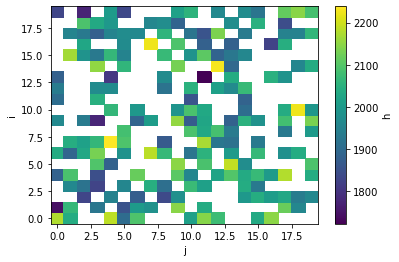

<xarray.Dataset>
Dimensions:  (i: 20, j: 20)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    h        (i, j) float64 2.176e+03 2.04e+03 nan ... 2.147e+03 2.085e+03
    d        (i, j) float64 -1.197 -2.232 nan nan ... nan -2.154 -0.8493 -1.66
    z        (i, j) int32 0 0 1 1 0 0 0 1 1 1 0 0 0 ... 1 0 0 1 0 1 0 0 1 0 0 0

In [12]:
N, M = 20, 20
np.random.seed(0)
X0 = None

X0 = xr.Dataset(
    data_vars=dict(
        h = (['i', 'j'], np.random.randn(N, M)*100 + 2000), 
        d = (['i', 'j'], np.random.randn(N, M) * 2), 
        z = (['i', 'j'], np.random.randint(2, size =(N, M))), 
    ),
    coords=dict(
        i = np.arange(N),
        j = np.arange(M)
    ),
    # attrs=dict(dh = dh, dd = dd
    # ),
    )
X0['h'] = X0.h.where(X0.z == 0)
X0['d'] = X0.d.where(X0.z == 0)
X0.h.plot()
plt.show()
X_next = None
X0

In [13]:
def neighborhood(ds, i, j,
                 n = 1 # neighbor degree
                 ):

    xlow = max(0, i - n)
    xupper = min(ds.dims['i'], i + n + 1)
    
    ylow = max(0, j - n)
    yupper = min(ds.dims['j'], j + n + 1)
    
    N = (slice(xlow, xupper, 1), slice(ylow, yupper, 1))
    
    return N

In [14]:
### simulation
import itertools

X = X0.copy(deep = True)
T = 5
t = 0
for t in range(T):
    print(f't = {t}', end = '\r')
    if t == 0 :
        Xt = X0.copy(deep = True)
    else:
        Xt = X.sel(t = t)
    X_next = X0.copy(deep = True)
    for i, j in itertools.product(Xt.i.data, Xt.j.data):
        N = neighborhood(Xt, i, j)
        pix = dict(i = i, j = j)
        y = [Xt.z[pix], Xt.h[pix], Xt.d[pix], 
             Xt.z[N].mean(), Xt.h[N].mean(), Xt.d[N].mean()]
    #     print(pix)
    #     print(y)
        y = np.array([yi.data for yi in y])
    #     print('y = ', y)
#         print('x = ', y[:3])
        x_next = step_pixel(*y, ds)
#         print('x_n =',x_next)
        X_next.z.loc[pix] = x_next[0]
        X_next.h.loc[pix] = x_next[1]
        X_next.d.loc[pix] = x_next[2]
    #     X_next.loc[pix]
    X_next['t'] = t+1
    X = xr.concat([X, X_next], dim = 't')
    X_next = None

    

In [15]:
df = pd.DataFrame(x, columns = ['h_t', 'd_t'])
df['cloud'] = df.apply(lambda x : 'cloud' if ~np.isnan(x.h_t) else 'clear sky', axis = 1)
dqf = df.cloud.apply(lambda x : 6 if x == 'clear sky' else 0)
df['ISCCP'] = util.classifyISCCP(df.d_t, df.h_t, dqf , bound = [np.log(3.6), np.log(23), 2e3, 8e3]).astype(int)

df = df.append({'h_t' : np.nan, 'd_t' : np.nan}, ignore_index = True)
df['h_t_next'] = np.roll(df.h_t, -1)
df['d_t_next'] = np.roll(df.d_t, -1)
df['cloud_next'] = np.roll(df.cloud, -1)
df['ISCCP_next'] =  np.roll(df.ISCCP, -1)
df.to_csv(f'../data/simulation/model1/sim_n={len(df) - 1}.csv')
df

ValueError: Shape of passed values is (2, 1), indices imply (2, 2)

In [31]:
def rgb(z, h, d, c = .92):
    light_blue = (173/255, 216/255, 230/255)
    if z:
        return (1,1,1)
    else: 
        h_, d_ = ml.CTHtoUnitInt(h), sim1.toInt((d + 1)/5, [0, 1])
        color = (            
            (h_) * c, 
            (-d_ + 1) * c  , 
            (-d_ + h_ + 1) * 0 + .8)
        return color
rgb(0, 1000, 4)


X['RGB'] = (['i', 'j','t', 'color'], np.zeros((20,20, len(X.t), 3)))
ds['RGB_colorbar'] = (['mu_d', 'mu_h', 'color'], np.zeros((len(ds.mu_d),len(ds.mu_h), 3)))

for i, j, t in itertools.product(X.i.data, X.j.data, X.t.data):
    pix = X.sel(i = i, j = j, t = t)
#     print( data.RGB.loc[dict(i = i , j = j)])
    X.RGB.loc[dict(i = i , j = j, t = t)] = np.array(rgb(pix.z.data, pix.h.data, pix.d.data))

for h, d in itertools.product(ds.mu_h, ds.mu_d):
#     print( data.RGB.loc[dict(i = i , j = j)])
#     print(h)
    ds.RGB_colorbar.loc[dict(mu_h = h, mu_d = d)] = np.array(rgb(0, h.data, d.data))
    

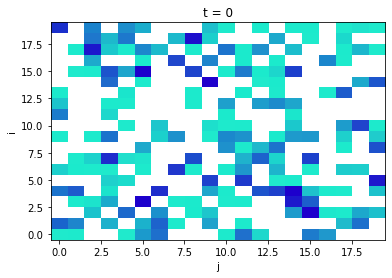

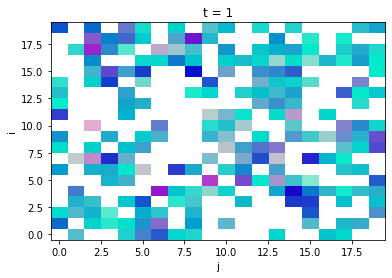

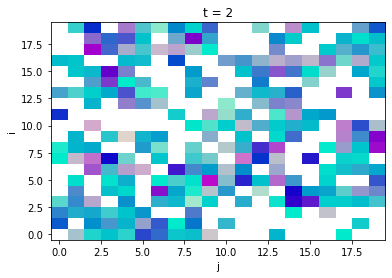

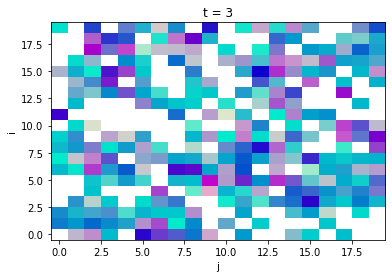

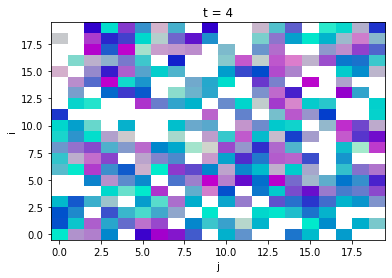

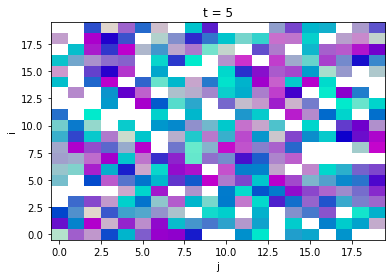

In [33]:
xr.plot.imshow(ds.RGB_colorbar)

for t in X.t.data:
    xr.plot.imshow(X.loc[dict(t = t)].RGB)
    plt.title(f't = {t}')
    plt.savefig(f'sim_model2_t={t}.png')
    plt.show()
    
    
